# Contributions Analysis of SHAP

In [1]:
%pwd

'/mnt/d/OneDrive - Kyushu University/ESG09_Article/Code'

In [2]:
%cd ..

/mnt/d/OneDrive - Kyushu University/ESG09_Article


/home/linux/anaconda3/envs/automl/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Import Package

In [143]:
from joblib import dump, load
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from scipy import stats
import seaborn as sns

## Contribution Analysis

### Load Data

In [4]:
Shap_df = load("Results/Shap_GenderTreamentDifference.joblib")

In [5]:
Concat_Shap = pd.concat(Shap_df, axis=0)

In [88]:
Concat_Shap.to_parquet("Results/Shap_GenderTreamentDifference.parquet")

In [129]:
Concat_Shap = pd.read_parquet("Results/Shap_GenderTreamentDifference.parquet")

In [7]:
colnames = Concat_Shap.columns

In [6]:
Concat_Shap.shape

(191122, 451)

### Visual the Top 10 Variables

In [95]:
shap_colnames = [item for item in colnames if '_shap' in item if 'Country_' not in item]

In [96]:
len(shap_colnames)

61

In [97]:
Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).head(20)

INCOME_2_shap               0.009316
Enough_food_shap            0.004757
Age_shap                    0.004523
Marital_status_shap         0.003909
Enjoyment_shap              0.003193
wave_shap                   0.002497
Freedom_chooselife_shap     0.002472
Corruption_business_shap    0.002411
Conf_military_shap          0.001988
Voice_official_shap         0.001845
Income_level_shap           0.001728
Feeling_income_shap         0.001666
Stolen_shap                 0.001638
Worry_shap                  0.001430
Stress_shap                 0.001409
Health_disable_shap         0.001374
Children_respected_shap     0.001364
Anger_shap                  0.001345
Good_minorities_shap        0.001287
Sat_oppofriend_shap         0.001240
dtype: float32

In [98]:
for item in Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index:
    print(item)

INCOME_2_shap
Enough_food_shap
Age_shap
Marital_status_shap
Enjoyment_shap
wave_shap
Freedom_chooselife_shap
Corruption_business_shap
Conf_military_shap
Voice_official_shap
Income_level_shap
Feeling_income_shap
Stolen_shap
Worry_shap
Stress_shap
Health_disable_shap
Children_respected_shap
Anger_shap
Good_minorities_shap
Sat_oppofriend_shap
Employment_shap
Good_gayles_shap
Conf_government_shap
Living_standard_change_shap
Assualted_shap
Smile_shap
Well_rested_shap
Sadness_shap
Safety_walk_shap
Corruption_government_shap
Religion_importance_shap
Conf_honestyelections_shap
Sat_road_shap
Economic_change_shap
Conf_financial_shap
Sat_healthcare_shap
City_satisficied_shap
Sat_qualitywater_shap
Enough_shelter_shap
Local_police_shap
Sat_dealpoor_shap
Volunteer_shap
Goodtime_job_shap
Children_under15_shap
Sat_qualityair_shap
Conf_judicial_shap
Good_immigrants_shap
Sat_pubtran_shap
Help_stranger_shap
Performance_leadership_shap
Respected_shap
Sat_perserveenv_shap
Donated_shap
Relative_have_shap
Ph

In [16]:
top = Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index[0:30]

In [29]:
means = Concat_Shap[shap_colnames].mean(axis=0)

In [30]:
std_errors = Concat_Shap[shap_colnames].sem(axis=0)

In [31]:
shap_colnames

['wave_shap',
 'INCOME_2_shap',
 'Health_disable_shap',
 'Relative_have_shap',
 'Living_standard_change_shap',
 'Enough_food_shap',
 'Enough_shelter_shap',
 'Well_rested_shap',
 'Respected_shap',
 'Smile_shap',
 'Interesting_thing_shap',
 'Enjoyment_shap',
 'Physical_pain_shap',
 'Worry_shap',
 'Sadness_shap',
 'Stress_shap',
 'Anger_shap',
 'City_satisficied_shap',
 'Economic_change_shap',
 'Goodtime_job_shap',
 'Sat_pubtran_shap',
 'Sat_road_shap',
 'Sat_edu_shap',
 'Sat_qualityair_shap',
 'Sat_qualitywater_shap',
 'Sat_healthcare_shap',
 'Sat_affhouse_shap',
 'Sat_oppofriend_shap',
 'Good_minorities_shap',
 'Good_gayles_shap',
 'Good_immigrants_shap',
 'Donated_shap',
 'Volunteer_shap',
 'Help_stranger_shap',
 'Voice_official_shap',
 'Local_police_shap',
 'Safety_walk_shap',
 'Stolen_shap',
 'Assualted_shap',
 'Religion_importance_shap',
 'Children_respected_shap',
 'Children_learn_shap',
 'Women_respected_shap',
 'Sat_dealpoor_shap',
 'Sat_perserveenv_shap',
 'Freedom_chooselife_sh

In [34]:
columns_of_interest = ["Wave", "Household Income", "Health Disability Dummy", "Having Relatives to Rely on Dummy",
                       "Living Standard Changing Direction", "Having Enough Food Dummy", "Having Enough Shelter Dummy", 
                       "Feeling Well Rested Dummy", "Feeling Respected Dummy", "Smiling Dummy",
                       "Doing Interesting Things Dummy", "Having Enjoyment Dummy", "Suffering Physical Pain Dummy",
                       "Feeling Worry Dummy", "Feeling Sad Dummy", "Feeling Stress Dummy", "Feeling Anger Dummy",
                       "Feeling Satisfied with City Dummy", "Economic Changing Direction", "Thinking Good Time to Find Job Dummy",
                       "Feeling Satisfied with Public Transportation Dummy", "Feeling Satisfied with Road Dummy", "Feeling Satisfied with Education Dummy",
                       "Feeling Satisfied with Air Quality Dummy", "Feeling Satisfied with Water Quality Dummy", "Feeling Satisfied with Healthcare Dummy", 
                       "Feeling Satisfied with Affordable House Dummy", "Feeling Satisfied with Opportunity to Make Friends Dummy",
                       "Thinking Good Place for Ethitical Minority Dummy", "Thinking Good Place for Gay or Lesbian Dummy", "Thinking Good Place for Immigrants Dummy",
                       "Donated Recently Dummy", "Did Volunteer Recently Dummy", "Helped Stranger Dummy",
                       "Voiced Opinion to Official Dummy", "Feeling Confident in Local Police Dummy", "Feeling Safe of Alone Night Walking Dummy",
                       "Having Been Stolen Dummy", "Having Been Assaulted Dummy", "Thinking Religion Importance Locally Dummy",
                       "Thinking Children Respected Locally Dummy", "Having Opportunity for Children Learning Locally Dummy", "Feeling Women Respected Dummy",
                       "Feeling Satisfied with Poverty Alleviation Dummy", "Feeling Satisfied with Environmental Efforts Dummy", "Feeling Freedom of Choosing Life Dummy",
                       "Feeling Confidence in Military Dummy", "Feeling Confidence in Judicial System Dummy", "Feeling Confidence in National Government Dummy",
                       "Feeling Confidence in Financial System Dummy", "Feeling Confidence in Election Honesty Dummy", "Feeling Freedom of Media Dummy",
                       "Prevailing Corruption within Business Dummy", "Prevailing Corruption within Government Dummy", "Approving of Leadership Performance Dummy",
                       "Age", "Marital Status", "Employment", 
                       "Children Under 15 Dummy", "Feeling of Income", "Income Level"]

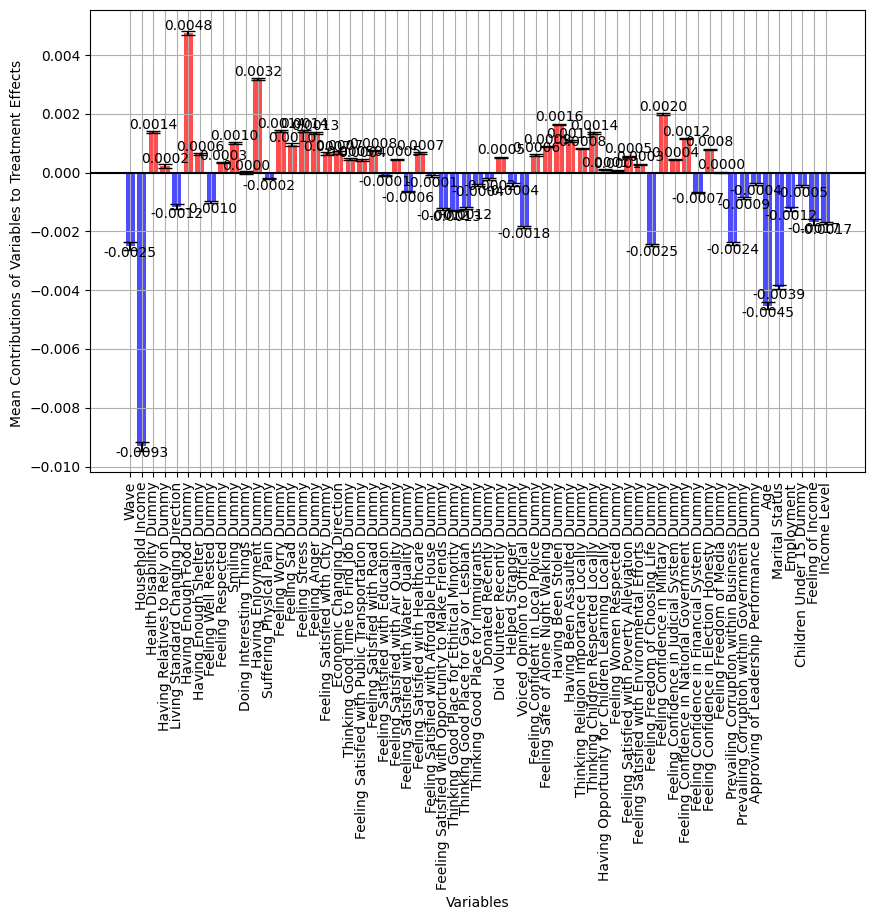

In [35]:
colors = ['red' if value > 0 else 'blue' for value in means]

plt.figure(figsize=(10, 6))
bars = plt.bar(x=columns_of_interest, height=means, yerr=std_errors, capsize=5, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom' if yval > 0 else 'top', fontsize=10)

# Adding labels and title
plt.xlabel('Variables')
plt.ylabel('Mean Contributions of Variables to Treatment Effects')
plt.xticks(rotation=90)
plt.grid()

plt.savefig('Figures/MJ_ShapTreatmentEffectGender.jpg', format='jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [40]:
means

wave_shap                     -0.002497
INCOME_2_shap                 -0.009316
Health_disable_shap            0.001374
Relative_have_shap             0.000220
Living_standard_change_shap   -0.001156
                                 ...   
Marital_status_shap           -0.003909
Employment_shap               -0.001240
Children_under15_shap         -0.000454
Feeling_income_shap           -0.001666
Income_level_shap             -0.001728
Length: 61, dtype: float32

In [41]:
std_errors

wave_shap                      0.000143
INCOME_2_shap                  0.000155
Health_disable_shap            0.000041
Relative_have_shap             0.000062
Living_standard_change_shap    0.000097
                                 ...   
Marital_status_shap            0.000069
Employment_shap                0.000071
Children_under15_shap          0.000029
Feeling_income_shap            0.000100
Income_level_shap              0.000037
Length: 61, dtype: float32

In [42]:
lower_boundary = means - 1.96 * std_errors
upper_boundary = means + 1.96 * std_errors

In [44]:
df_shap_summary = pd.DataFrame({
    'Mean SHAP': means,
    'Lower Boundary 95% CI': lower_boundary,
    'Upper Boundary 95% CI': upper_boundary
})

In [46]:
df_shap_summary.index = columns_of_interest

In [47]:
df_shap_summary.head()

,Mean SHAP,Lower Boundary 95% CI,Upper Boundary 95% CI
Wave,-0.002497,-0.002777,-0.002217
Household Income,-0.009316,-0.009619,-0.009013
Health Disability Dummy,0.001374,0.001293,0.001455
Having Relatives to Rely on Dummy,0.000220,0.000099,0.000342
Living Standard Changing Direction,-0.001156,-0.001346,-0.000966


In [49]:
df_shap_summary = df_shap_summary * 1000

In [50]:
df_shap_summary.head()

,Mean SHAP,Lower Boundary 95% CI,Upper Boundary 95% CI
Wave,-2.496731,-2.776903,-2.216559
Household Income,-9.316066,-9.619124,-9.013006
Health Disability Dummy,1.374128,1.293213,1.455044
Having Relatives to Rely on Dummy,0.220458,0.099407,0.341508
Living Standard Changing Direction,-1.156050,-1.346182,-0.965919


In [57]:
df_shap_summary.sort_values(by='Mean SHAP', key=lambda x: x.abs(), ascending=False).to_excel('Results/MJ_ShapResult.xlsx')

### Income and its SHAP Values

In [71]:
Concat_Shap['INCOME_2'].describe()

count    1.911220e+05
mean     2.433664e+04
std      8.170754e+04
min      0.000000e+00
25%      4.205930e+03
50%      1.055181e+04
75%      2.614364e+04
max      9.682815e+06
Name: INCOME_2, dtype: float64

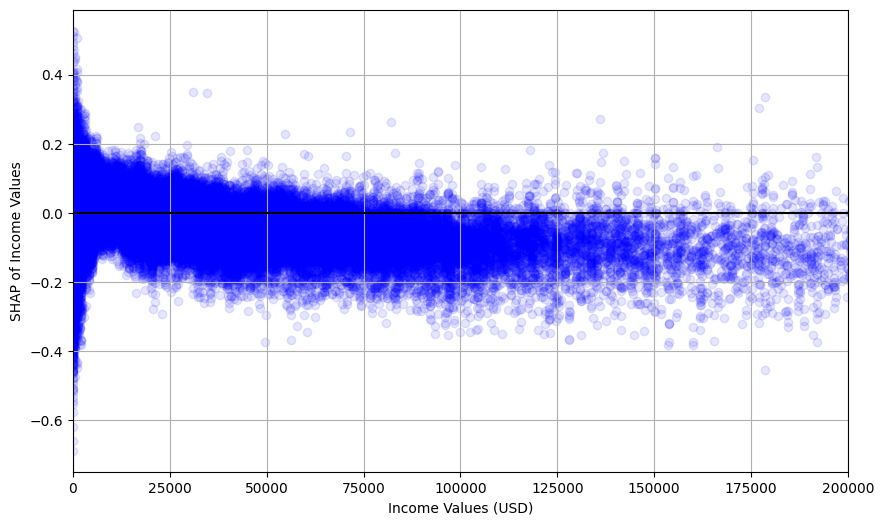

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(Concat_Shap['INCOME_2'], Concat_Shap['INCOME_2_shap'], alpha=0.1, color='blue')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

plt.xlim([0, 200_000])

# Adding labels and title
plt.xlabel('Income Values (USD)')
plt.ylabel('SHAP of Income Values')
plt.grid()

# Show the plot
plt.show()

### Age and its SHAP Values

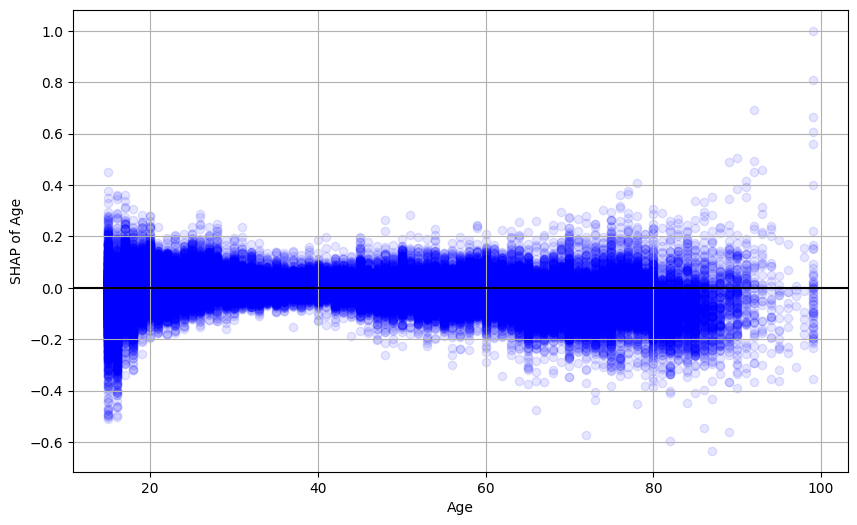

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(Concat_Shap['Age'], Concat_Shap['Age_shap'], alpha=0.1, color='blue')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('SHAP of Age')
plt.grid()

# Show the plot
plt.show()

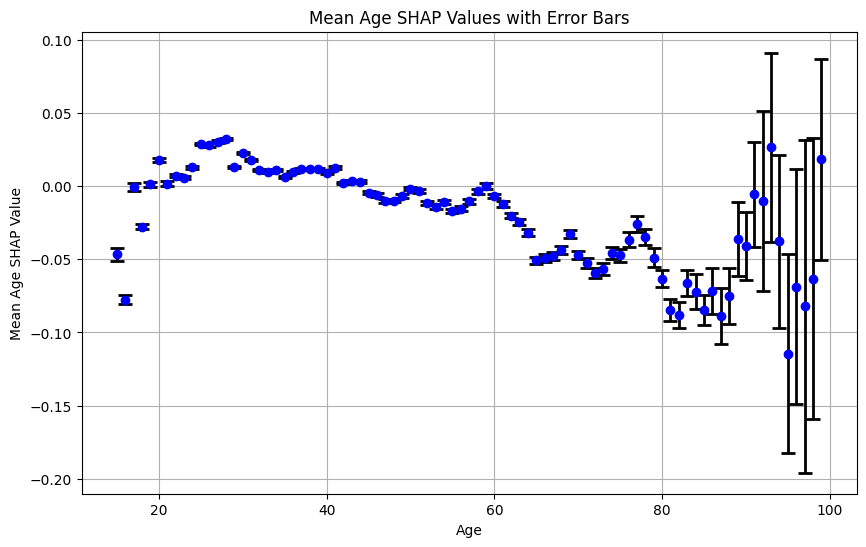

In [86]:
grouped = Concat_Shap.groupby('Age')['Age_shap'].agg(['mean', 'sem'])

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x=grouped.index, y=grouped['mean'], yerr=grouped['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Mean Age SHAP Value')

# Optional: Add grid and show plot
plt.grid(True)
plt.show()

### wave and its SHAP Values

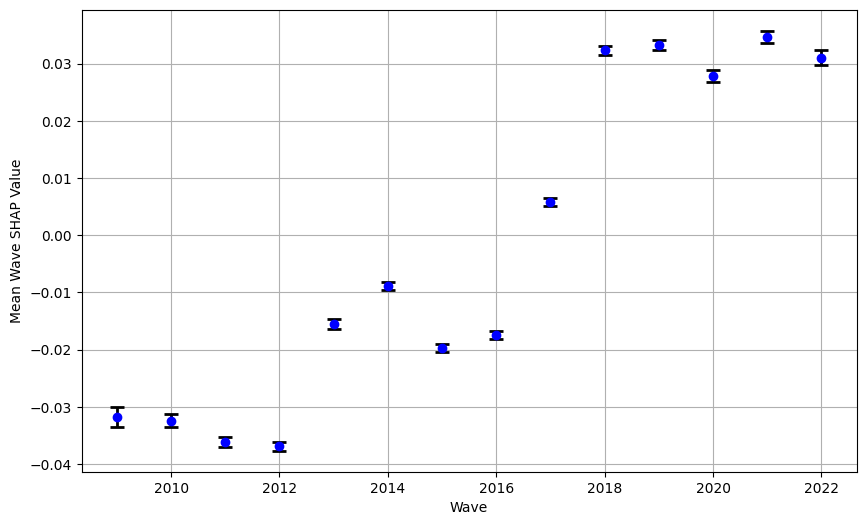

In [88]:
grouped = Concat_Shap.groupby('wave')['wave_shap'].agg(['mean', 'sem'])

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x=grouped.index + 2005, y=grouped['mean'], yerr=grouped['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)

# Adding labels and title
plt.xlabel('Wave')
plt.ylabel('Mean Wave SHAP Value')

# Optional: Add grid and show plot
plt.grid(True)
plt.show()

### Marital Status

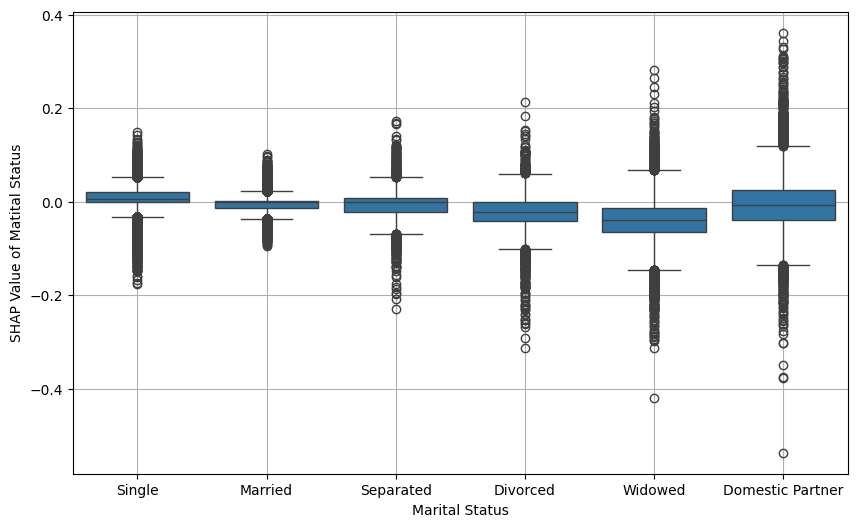

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_status', y='Marital_status_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Marital Status')
plt.ylabel('SHAP Value of Matital Status')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Separated', 'Divorced', 'Widowed', 'Domestic Partner'])

# Show the plot
plt.grid(True)
plt.show()

### Income Level

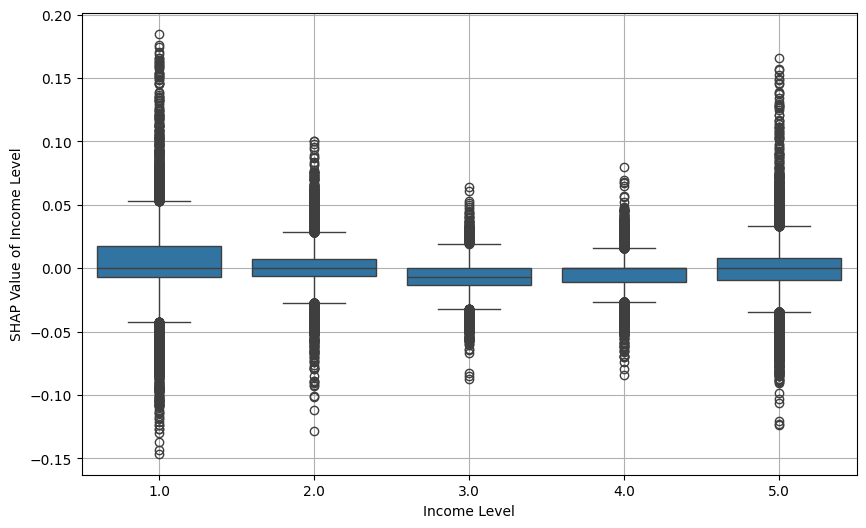

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_level', y='Income_level_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Income Level')
plt.ylabel('SHAP Value of Income Level')

# Show the plot
plt.grid(True)
plt.show()

### Feeling of income

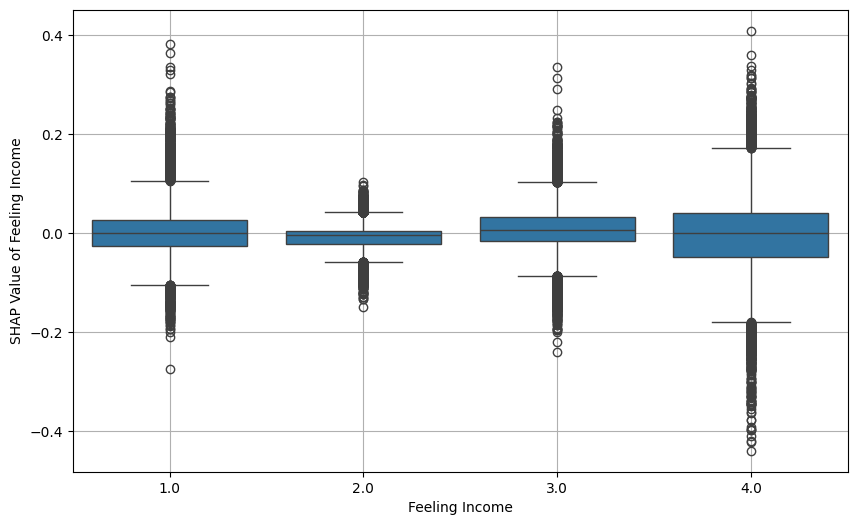

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feeling_income', y='Feeling_income_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Feeling Income')
plt.ylabel('SHAP Value of Feeling Income')

# Show the plot
plt.grid(True)
plt.show()

### Employment

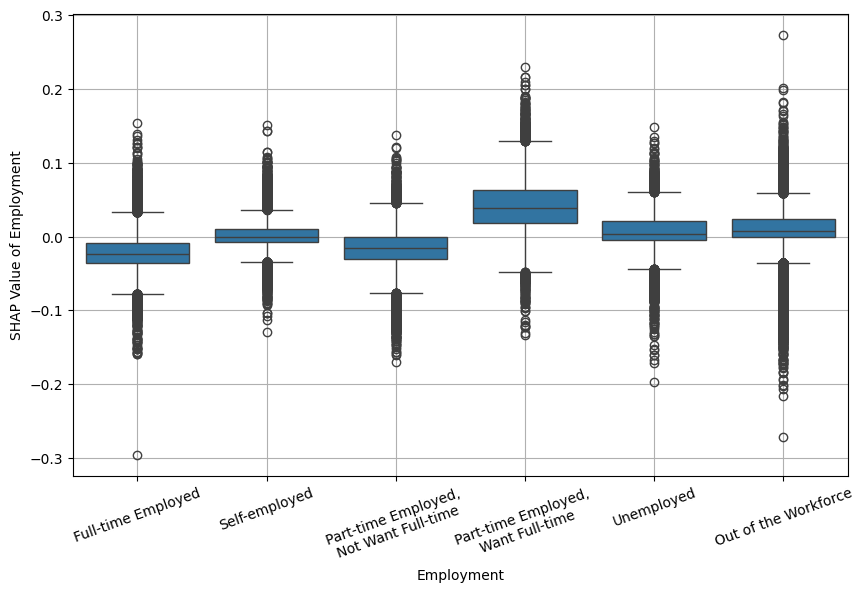

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment', y='Employment_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Employment')
plt.ylabel('SHAP Value of Employment')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Full-time Employed', 'Self-employed', 'Part-time Employed,\nNot Want Full-time', 
                                             'Part-time Employed,\nWant Full-time', 'Unemployed', 'Out of the Workforce'], 
          rotation = 20)

# Show the plot
plt.grid(True)
plt.show()

### Economic Change Direction

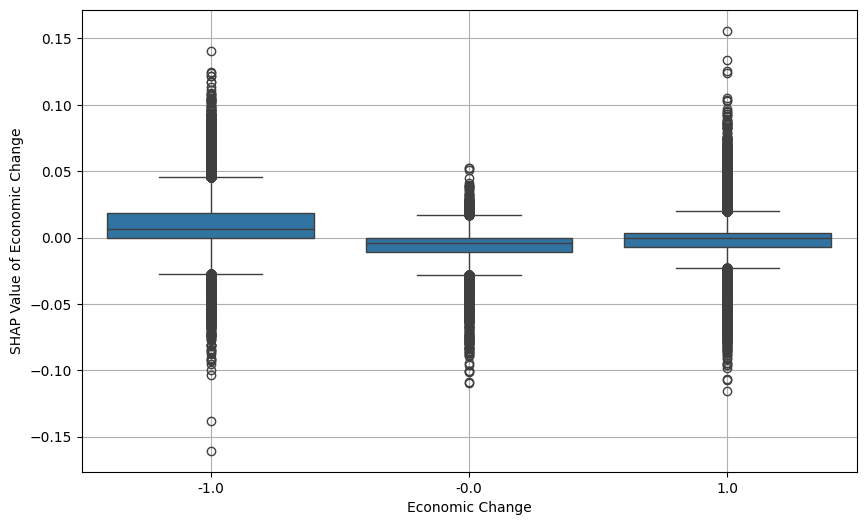

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Economic_change', y='Economic_change_shap', data=Concat_Shap)

# Adding labels and title
plt.xlabel('Economic Change')
plt.ylabel('SHAP Value of Economic Change')

# Show the plot
plt.grid(True)
plt.show()

### Plot 9 Figure Together

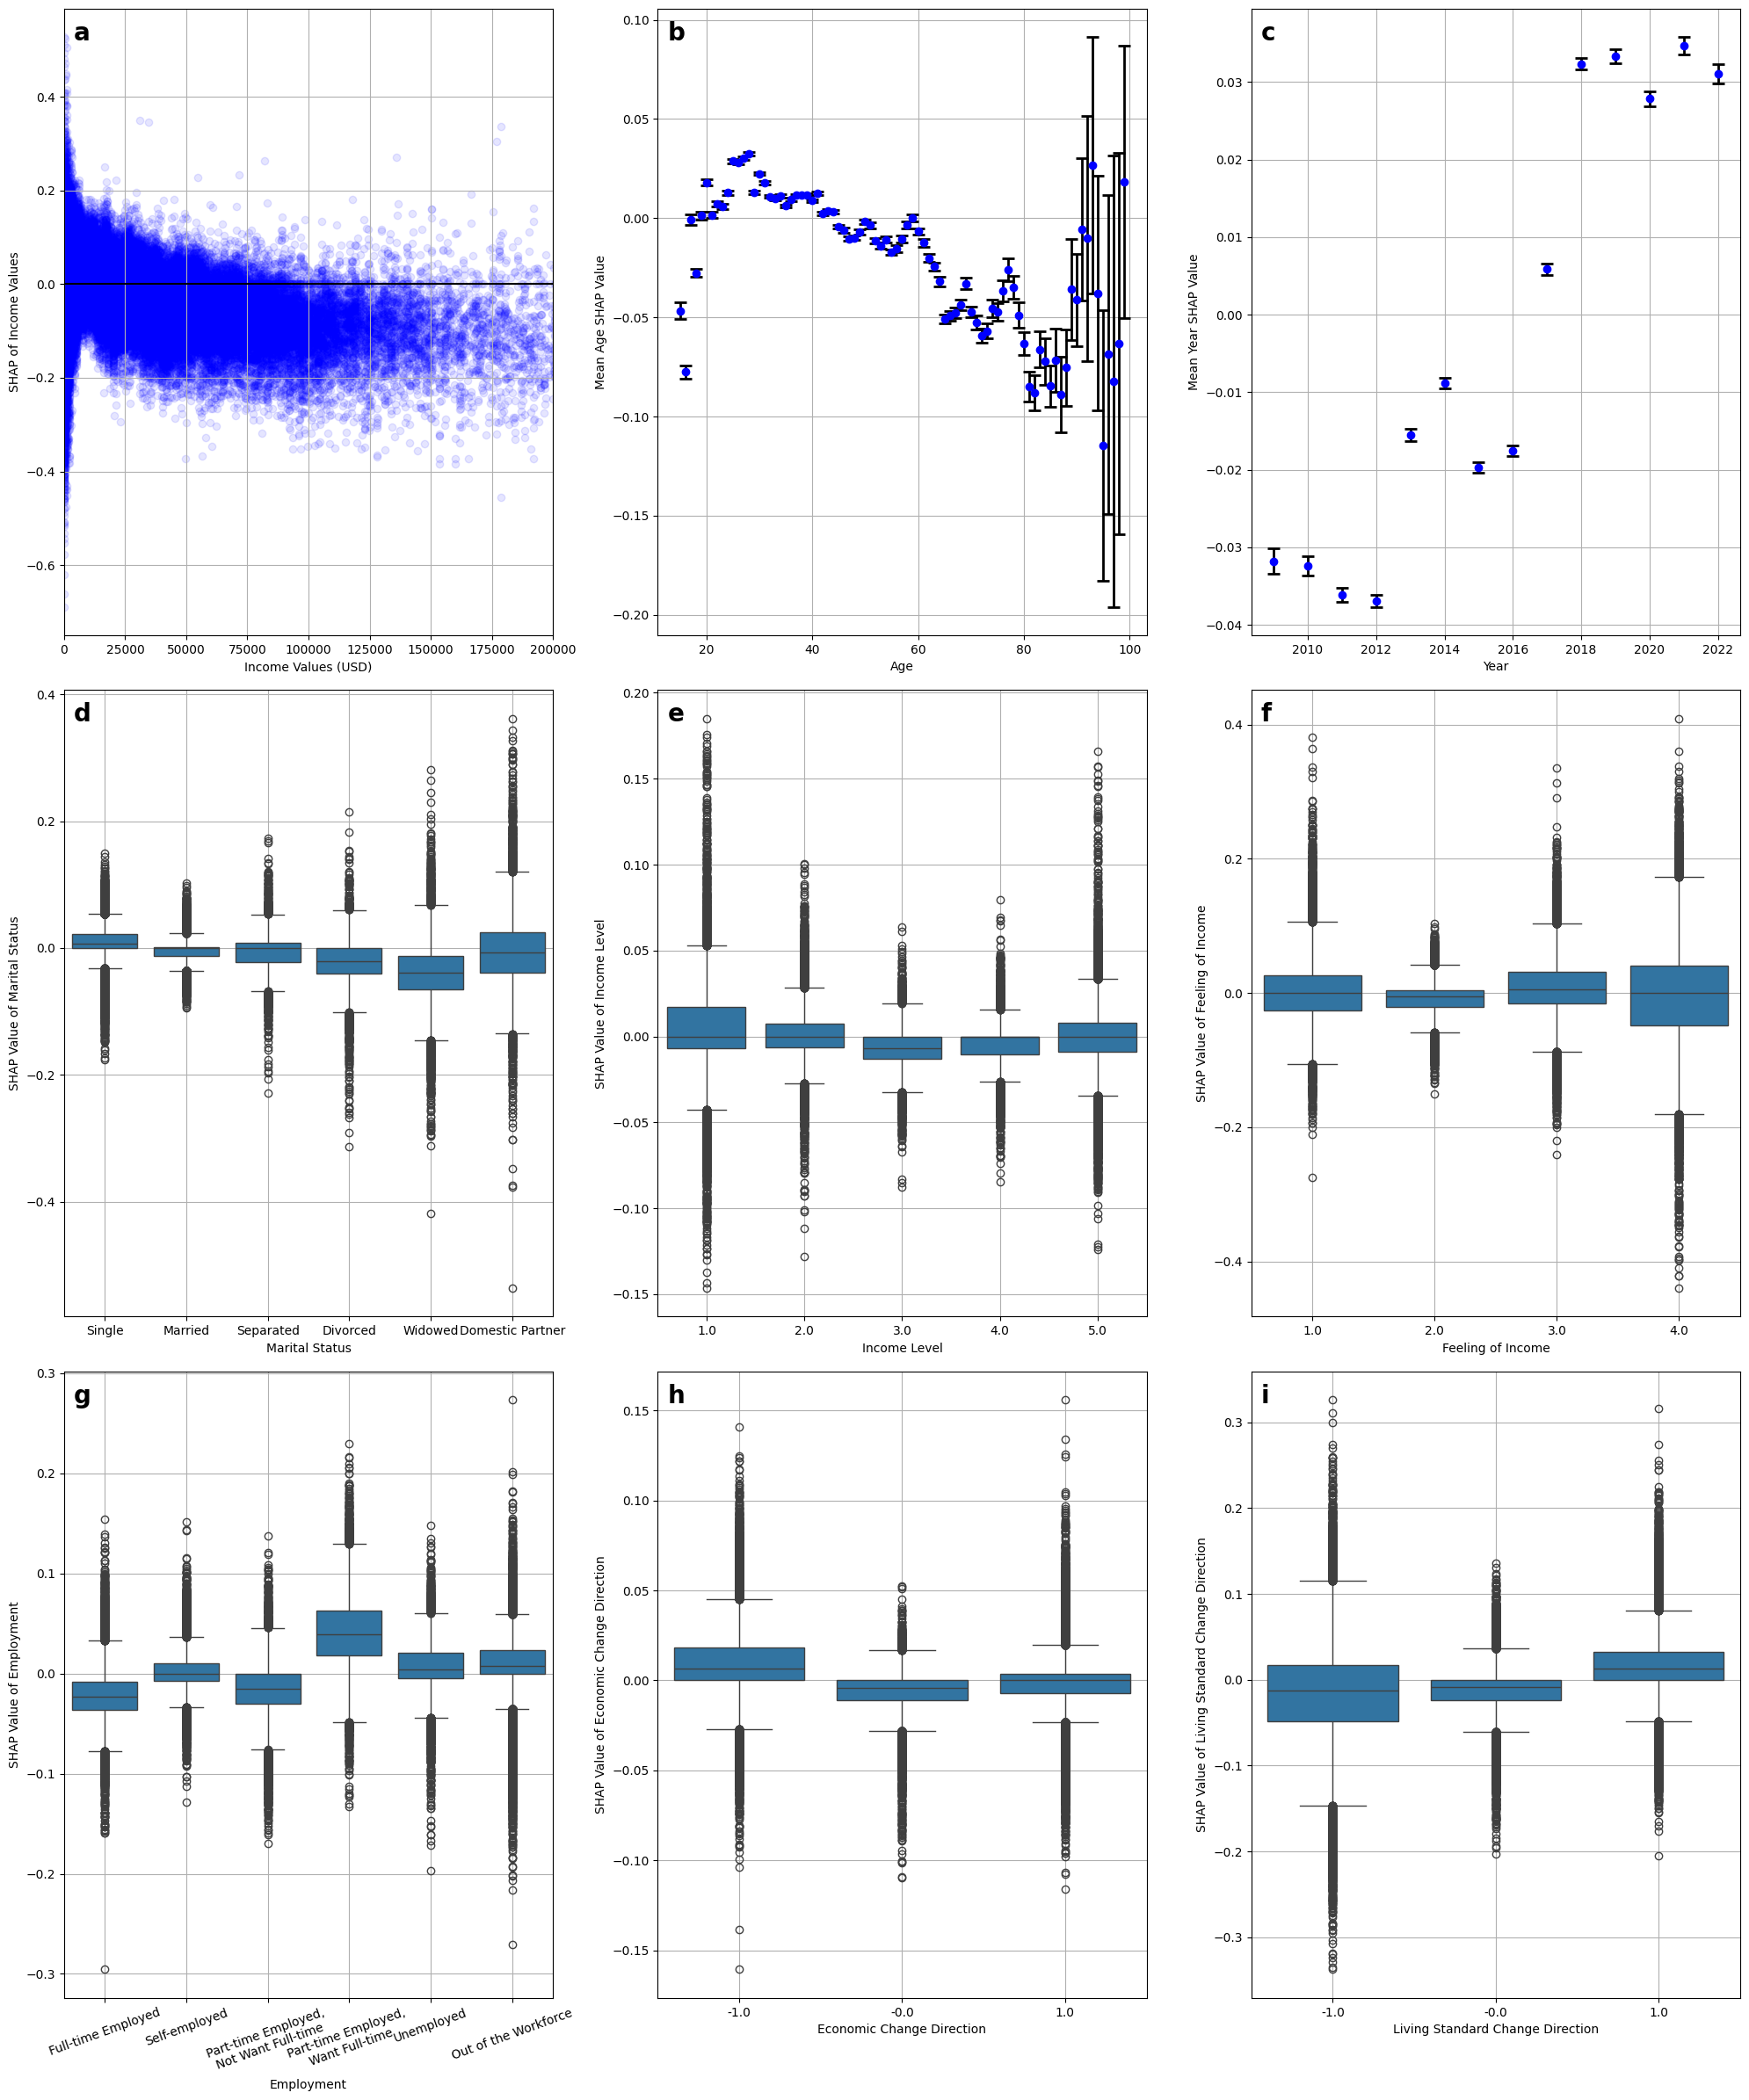

In [121]:
# Create a figure with 8 subplots (2 columns, 4 rows)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 24))

# Plot 1: Scatter plot for Age vs Age_shap
axes[0, 0].scatter(Concat_Shap['INCOME_2'], Concat_Shap['INCOME_2_shap'], alpha=0.1, color='blue')
axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=1.5)
axes[0, 0].set_xlim([0, 200_000])
axes[0, 0].set_xlabel('Income Values (USD)')
axes[0, 0].set_ylabel('SHAP of Income Values')
axes[0, 0].grid(True)
axes[0, 0].annotate('a', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 2: Error bar plot for Mean Age SHAP by Age
grouped_age = Concat_Shap.groupby('Age')['Age_shap'].agg(['mean', 'sem'])
axes[0, 1].errorbar(x=grouped_age.index, y=grouped_age['mean'], yerr=grouped_age['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Mean Age SHAP Value')
axes[0, 1].grid(True)
axes[0, 1].annotate('b', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 3: Error bar plot for Mean Wave SHAP by Wave
grouped_wave = Concat_Shap.groupby('wave')['wave_shap'].agg(['mean', 'sem'])
axes[0, 2].errorbar(x=grouped_wave.index + 2005, y=grouped_wave['mean'], yerr=grouped_wave['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Mean Year SHAP Value')
axes[0, 2].grid(True)
axes[0, 2].annotate('c', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 4: Box plot for Marital Status SHAP values
sns.boxplot(x='Marital_status', y='Marital_status_shap', data=Concat_Shap, ax=axes[1, 0])
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('SHAP Value of Marital Status')
axes[1, 0].set_xticks(ticks=[0, 1, 2, 3, 4, 5])
axes[1, 0].set_xticklabels(['Single', 'Married', 'Separated', 'Divorced', 'Widowed', 'Domestic Partner'])
axes[1, 0].grid(True)
axes[1, 0].annotate('d', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 5: Box plot for Income Level SHAP values
sns.boxplot(x='Income_level', y='Income_level_shap', data=Concat_Shap, ax=axes[1, 1])
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('SHAP Value of Income Level')
axes[1, 1].grid(True)
axes[1, 1].annotate('e', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 6: Box plot for Feeling Income SHAP values
sns.boxplot(x='Feeling_income', y='Feeling_income_shap', data=Concat_Shap, ax=axes[1, 2])
axes[1, 2].set_xlabel('Feeling of Income')
axes[1, 2].set_ylabel('SHAP Value of Feeling of Income')
axes[1, 2].grid(True)
axes[1, 2].annotate('f', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 7: Box plot for Employment SHAP values
sns.boxplot(x='Employment', y='Employment_shap', data=Concat_Shap, ax=axes[2, 0])
axes[2, 0].set_xlabel('Employment')
axes[2, 0].set_ylabel('SHAP Value of Employment')
axes[2, 0].set_xticks(ticks=[0, 1, 2, 3, 4, 5])
axes[2, 0].set_xticklabels(['Full-time Employed', 'Self-employed', 'Part-time Employed,\nNot Want Full-time', 'Part-time Employed,\nWant Full-time', 'Unemployed', 'Out of the Workforce'], rotation=20)
axes[2, 0].grid(True)
axes[2, 0].annotate('g', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 8: Box plot for Economic Change SHAP values
sns.boxplot(x='Economic_change', y='Economic_change_shap', data=Concat_Shap, ax=axes[2, 1])
axes[2, 1].set_xlabel('Economic Change Direction')
axes[2, 1].set_ylabel('SHAP Value of Economic Change Direction')
axes[2, 1].grid(True)
axes[2, 1].annotate('h', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 9: Box plot for Economic Change SHAP values
sns.boxplot(x='Living_standard_change', y='Living_standard_change_shap', data=Concat_Shap, ax=axes[2, 2])
axes[2, 2].set_xlabel('Living Standard Change Direction')
axes[2, 2].set_ylabel('SHAP Value of Living Standard Change Direction')
axes[2, 2].grid(True)
axes[2, 2].annotate('i', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Figures/MJ_ShapOtherVariablesTreatmentEffectGender.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### Plot Top 6 Figure Together

/tmp/ipykernel_20277/2331348772.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 0].set_xticklabels(['Full-time Employed', 'Self-employed', 'Part-time Employed,\nNot Want Full-time',


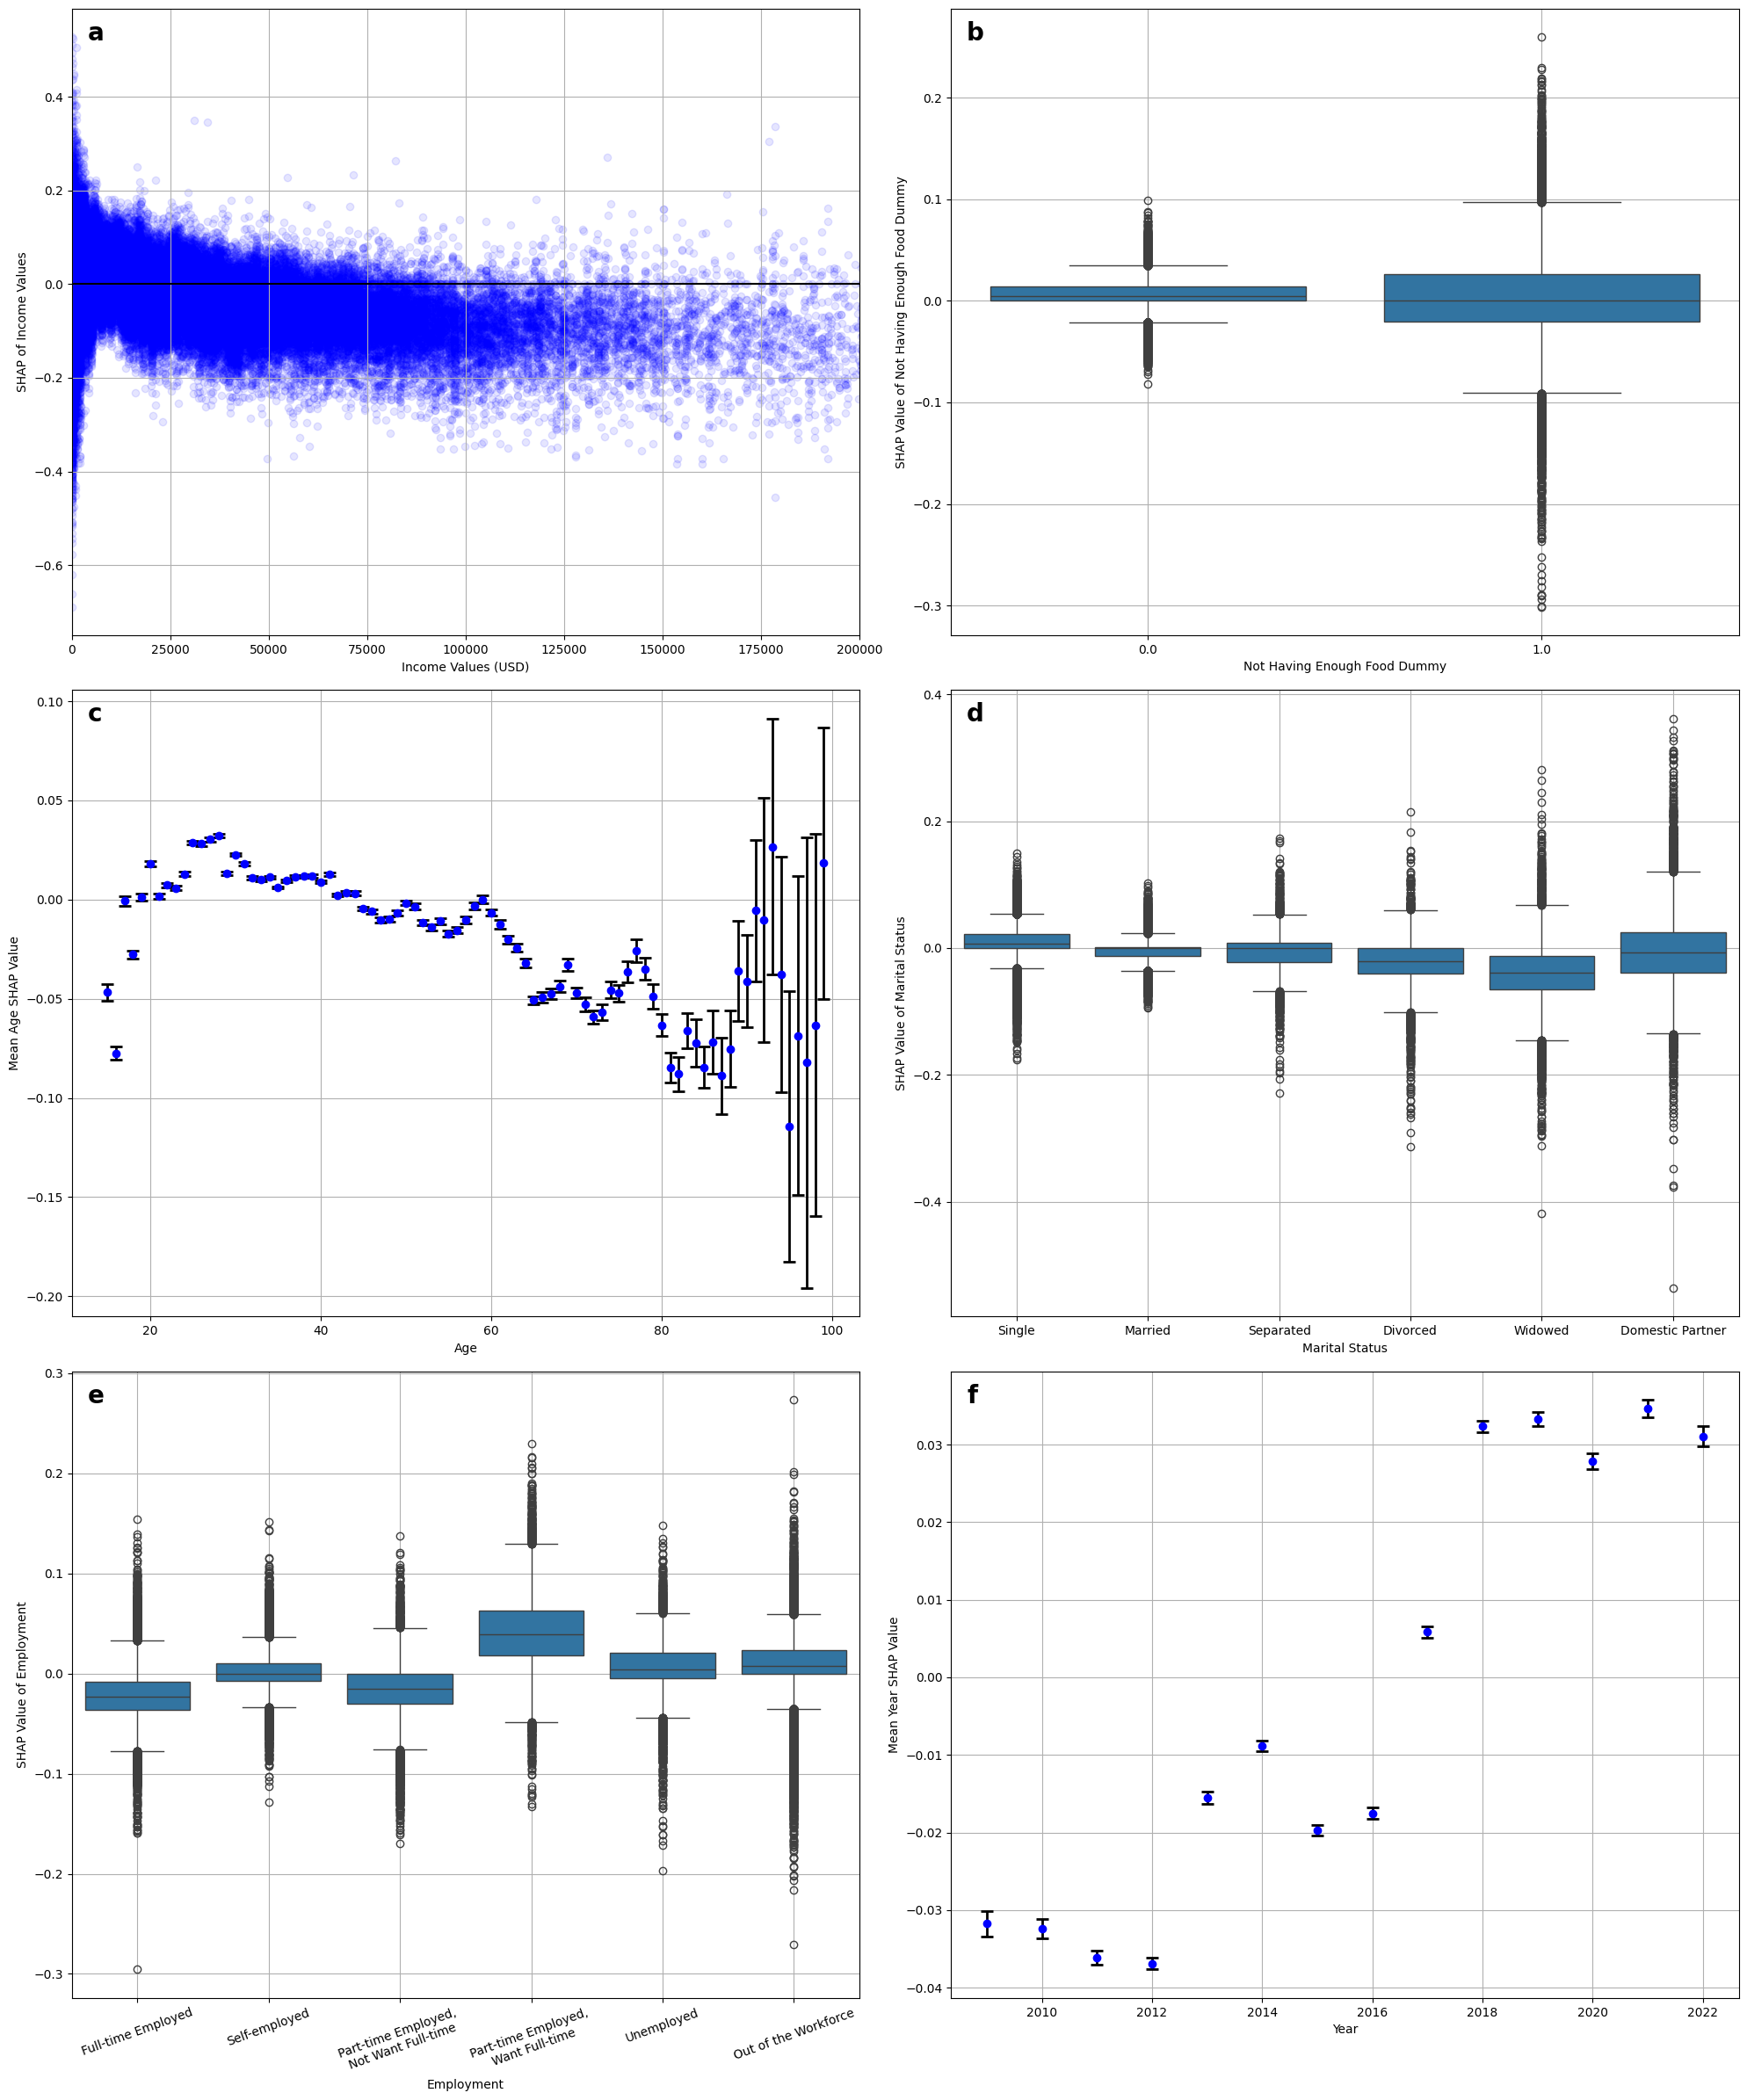

In [151]:
# Create a figure with 8 subplots (2 columns, 4 rows)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 24))

# Plot 1: Scatter plot for Age vs Age_shap
axes[0, 0].scatter(Concat_Shap['INCOME_2'], Concat_Shap['INCOME_2_shap'], alpha=0.1, color='blue')
axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=1.5)
axes[0, 0].set_xlim([0, 200_000])
axes[0, 0].set_xlabel('Income Values (USD)')
axes[0, 0].set_ylabel('SHAP of Income Values')
axes[0, 0].grid(True)
axes[0, 0].annotate('a', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

#Enough_food_shap
# Plot 2: Box plot
sns.boxplot(x='Enough_food', y='Enough_food_shap', data=Concat_Shap, ax=axes[0, 1])
axes[0, 1].set_xlabel('Not Having Enough Food Dummy')
axes[0, 1].set_ylabel('SHAP Value of Not Having Enough Food Dummy')
axes[0, 1].grid(True)
axes[0, 1].annotate('b', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 3: Error bar plot for Mean Age SHAP by Age
grouped_age = Concat_Shap.groupby('Age')['Age_shap'].agg(['mean', 'sem'])
axes[1, 0].errorbar(x=grouped_age.index, y=grouped_age['mean'], yerr=grouped_age['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Mean Age SHAP Value')
axes[1, 0].grid(True)
axes[1, 0].annotate('c', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 4: Box plot for Marital Status SHAP values
sns.boxplot(x='Marital_status', y='Marital_status_shap', data=Concat_Shap, ax=axes[1, 1])
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('SHAP Value of Marital Status')
axes[1, 1].set_xticks(ticks=[0, 1, 2, 3, 4, 5])
axes[1, 1].set_xticklabels(['Single', 'Married', 'Separated', 'Divorced', 'Widowed', 'Domestic Partner'])
axes[1, 1].grid(True)
axes[1, 1].annotate('d', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 5: Box plot for Income Level SHAP values
sns.boxplot(x='Employment', y='Employment_shap', data=Concat_Shap, ax=axes[2, 0])
axes[2, 0].set_xlabel('Employment')
axes[2, 0].set_ylabel('SHAP Value of Employment')

axes[2, 0].set_xticklabels(['Full-time Employed', 'Self-employed', 'Part-time Employed,\nNot Want Full-time', 
                                                             'Part-time Employed,\nWant Full-time', 'Unemployed', 'Out of the Workforce'], 
                           rotation = 20)
axes[2, 0].grid(True)
axes[2, 0].annotate('e', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Plot 6: Error bar plot for Mean Wave SHAP by Wave
grouped_wave = Concat_Shap.groupby('wave')['wave_shap'].agg(['mean', 'sem'])
axes[2, 1].errorbar(x=grouped_wave.index + 2005, y=grouped_wave['mean'], yerr=grouped_wave['sem']*1.96, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=2, capthick=2)
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Mean Year SHAP Value')
axes[2, 1].grid(True)
axes[2, 1].annotate('f', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=20, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Figures/MJ_ShapTop6VariablesTreatmentEffectGender.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### SHAP Difference of Binary Variable

In [95]:
shap_colnames = [item for item in colnames if '_shap' in item if 'Country_' not in item]

In [98]:
for item in Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index:
    print(item)

INCOME_2_shap
Enough_food_shap
Age_shap
Marital_status_shap
Enjoyment_shap
wave_shap
Freedom_chooselife_shap
Corruption_business_shap
Conf_military_shap
Voice_official_shap
Income_level_shap
Feeling_income_shap
Stolen_shap
Worry_shap
Stress_shap
Health_disable_shap
Children_respected_shap
Anger_shap
Good_minorities_shap
Sat_oppofriend_shap
Employment_shap
Good_gayles_shap
Conf_government_shap
Living_standard_change_shap
Assualted_shap
Smile_shap
Well_rested_shap
Sadness_shap
Safety_walk_shap
Corruption_government_shap
Religion_importance_shap
Conf_honestyelections_shap
Sat_road_shap
Economic_change_shap
Conf_financial_shap
Sat_healthcare_shap
City_satisficied_shap
Sat_qualitywater_shap
Enough_shelter_shap
Local_police_shap
Sat_dealpoor_shap
Volunteer_shap
Goodtime_job_shap
Children_under15_shap
Sat_qualityair_shap
Conf_judicial_shap
Good_immigrants_shap
Sat_pubtran_shap
Help_stranger_shap
Performance_leadership_shap
Respected_shap
Sat_perserveenv_shap
Donated_shap
Relative_have_shap
Ph

In [124]:
columns_of_interest = ["Wave", "Household Income", "Health Disability Dummy", "Having Relatives to Rely on Dummy",
                       "Living Standard Changing Direction", "Having Enough Food Dummy", "Having Enough Shelter Dummy", 
                       "Feeling Well Rested Dummy", "Feeling Respected Dummy", "Smiling Dummy",
                       "Doing Interesting Things Dummy", "Having Enjoyment Dummy", "Suffering Physical Pain Dummy",
                       "Feeling Worry Dummy", "Feeling Sad Dummy", "Feeling Stress Dummy", "Feeling Anger Dummy",
                       "Feeling Satisfied with City Dummy", "Economic Changing Direction", "Thinking Good Time to Find Job Dummy",
                       "Feeling Satisfied with Public Transportation Dummy", "Feeling Satisfied with Road Dummy", "Feeling Satisfied with Education Dummy",
                       "Feeling Satisfied with Air Quality Dummy", "Feeling Satisfied with Water Quality Dummy", "Feeling Satisfied with Healthcare Dummy", 
                       "Feeling Satisfied with Affordable House Dummy", "Feeling Satisfied with Opportunity to Make Friends Dummy",
                       "Thinking Good Place for Ethitical Minority Dummy", "Thinking Good Place for Gay or Lesbian Dummy", "Thinking Good Place for Immigrants Dummy",
                       "Donated Recently Dummy", "Did Volunteer Recently Dummy", "Helped Stranger Dummy",
                       "Voiced Opinion to Official Dummy", "Feeling Confident in Local Police Dummy", "Feeling Safe of Alone Night Walking Dummy",
                       "Having Been Stolen Dummy", "Having Been Assaulted Dummy", "Thinking Religion Importance Locally Dummy",
                       "Thinking Children Respected Locally Dummy", "Having Opportunity for Children Learning Locally Dummy", "Feeling Women Respected Dummy",
                       "Feeling Satisfied with Poverty Alleviation Dummy", "Feeling Satisfied with Environmental Efforts Dummy", "Feeling Freedom of Choosing Life Dummy",
                       "Feeling Confidence in Military Dummy", "Feeling Confidence in Judicial System Dummy", "Feeling Confidence in National Government Dummy",
                       "Feeling Confidence in Financial System Dummy", "Feeling Confidence in Election Honesty Dummy", "Feeling Freedom of Media Dummy",
                       "Prevailing Corruption within Business Dummy", "Prevailing Corruption within Government Dummy", "Approving of Leadership Performance Dummy",
                       "Age", "Marital Status", "Employment", 
                       "Children Under 15 Dummy", "Feeling of Income", "Income Level"]

In [125]:
non_binary_colnames = ['INCOME_2_shap', 'Age_shap', 'Marital_status_shap', 'wave_shap',
                      'Income_level_shap', 'Feeling_income_shap', 'Employment_shap', 'Economic_change_shap',
                      'Living_standard_change_shap']

In [126]:
binary_colnames = []
beautifual_binary_colnames = []
for i, item in enumerate(shap_colnames):
    if item not in non_binary_colnames:
        binary_colnames.append(item)
        beautifual_binary_colnames.append(columns_of_interest[i])

In [132]:
Concat_Shap['Health_disable'] = abs(Concat_Shap['Health_disable'] - 2)

In [133]:
Concat_Shap['Health_disable'].describe()

count    191122.000000
mean          0.246764
std           0.431129
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Health_disable, dtype: float64

In [140]:
def star(p):
    if p < 0.001:
        out = '***'
    elif p < 0.01:
        out = '**'
    elif p < 0.05:
        out = '*'
    else:
        out = ''
    return out

In [145]:
binary_df = []
for item, beautiful_item in zip(binary_colnames, beautifual_binary_colnames):
    group_1 = Concat_Shap[Concat_Shap[item.replace('_shap', '')] == 1][item]
    group_0 = Concat_Shap[Concat_Shap[item.replace('_shap', '')] == 0][item]

    t_stat, p_value = stats.ttest_ind(group_0, group_1)
    diff = (np.mean(group_1) - np.mean(group_0)) * 1_000
    
    line = [beautiful_item, f"{diff:.3f}{star(p_value)}"]
    print(line)
    binary_df.append(line)

['Health Disability Dummy', '-11.446***']
['Having Relatives to Rely on Dummy', '20.067***']
['Having Enough Food Dummy', '-2.675***']
['Having Enough Shelter Dummy', '0.407***']
['Feeling Well Rested Dummy', '-12.600***']
['Feeling Respected Dummy', '-7.103***']
['Smiling Dummy', '-0.182***']
['Doing Interesting Things Dummy', '-1.213***']
['Having Enjoyment Dummy', '-4.669***']
['Suffering Physical Pain Dummy', '1.277***']
['Feeling Worry Dummy', '-13.667***']
['Feeling Sad Dummy', '22.732***']
['Feeling Stress Dummy', '-5.193***']
['Feeling Anger Dummy', '8.881***']
['Feeling Satisfied with City Dummy', '8.048***']
['Thinking Good Time to Find Job Dummy', '-0.779***']
['Feeling Satisfied with Public Transportation Dummy', '-1.269***']
['Feeling Satisfied with Road Dummy', '1.853***']
['Feeling Satisfied with Education Dummy', '0.138***']
['Feeling Satisfied with Air Quality Dummy', '-4.935***']
['Feeling Satisfied with Water Quality Dummy', '4.889***']
['Feeling Satisfied with Healt

### Visual the Top 10 Country

In [63]:
shap_colnames = [item for item in colnames if '_shap' in item if 'Country_' in item]

In [64]:
Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).head(20)

Country_JOR_shap    0.003569
Country_IRN_shap    0.003296
Country_UZB_shap    0.003225
Country_SLE_shap    0.003058
Country_NIC_shap    0.002894
Country_KAZ_shap    0.002530
Country_PER_shap    0.002298
Country_DOM_shap    0.002011
Country_COD_shap    0.001930
Country_COG_shap    0.001886
Country_TCD_shap    0.001776
Country_PSE_shap    0.001755
Country_YEM_shap    0.001594
Country_GHA_shap    0.001442
Country_BWA_shap    0.001388
Country_IRQ_shap    0.001375
Country_SAU_shap    0.001366
Country_TZA_shap    0.001364
Country_MDG_shap    0.001271
Country_PRY_shap    0.001238
dtype: float32

In [65]:
top10 = Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index[0:60]

In [66]:
means = Concat_Shap[top10].mean(axis=0)

In [67]:
std_errors = Concat_Shap[top10].sem(axis=0)

In [68]:
columns_of_interest = top10
columns_of_interest = [item.replace('Country_', '').replace('_shap', '') for item in columns_of_interest]

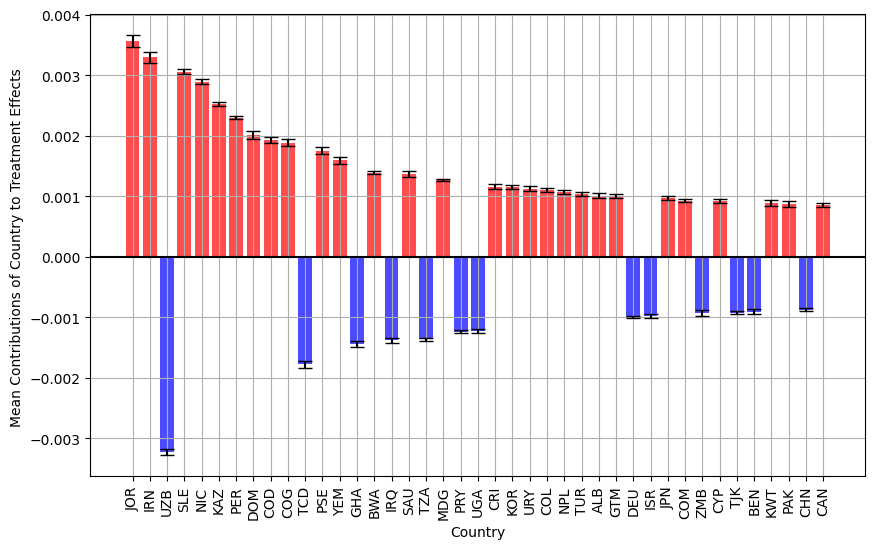

In [69]:
top10 = Concat_Shap[shap_colnames].mean(axis=0).abs().sort_values(ascending=False).index[0:41]
means = Concat_Shap[top10].mean(axis=0)
std_errors = Concat_Shap[top10].sem(axis=0)
columns_of_interest = top10
columns_of_interest = [item.replace('Country_', '').replace('_shap', '') for item in columns_of_interest]

colors = ['red' if value > 0 else 'blue' for value in means]

plt.figure(figsize=(10, 6))
bars = plt.bar(x=columns_of_interest, height=means, yerr=std_errors, capsize=5, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Mean Contributions of Country to Treatment Effects ')
plt.xticks(rotation=90)
plt.grid()

plt.savefig('Figures/MJ_ShapCountryTreatmentEffectGender.jpg', format='jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()